## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 96](#Problem-96)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 96 <a name="Problem-96"></a>

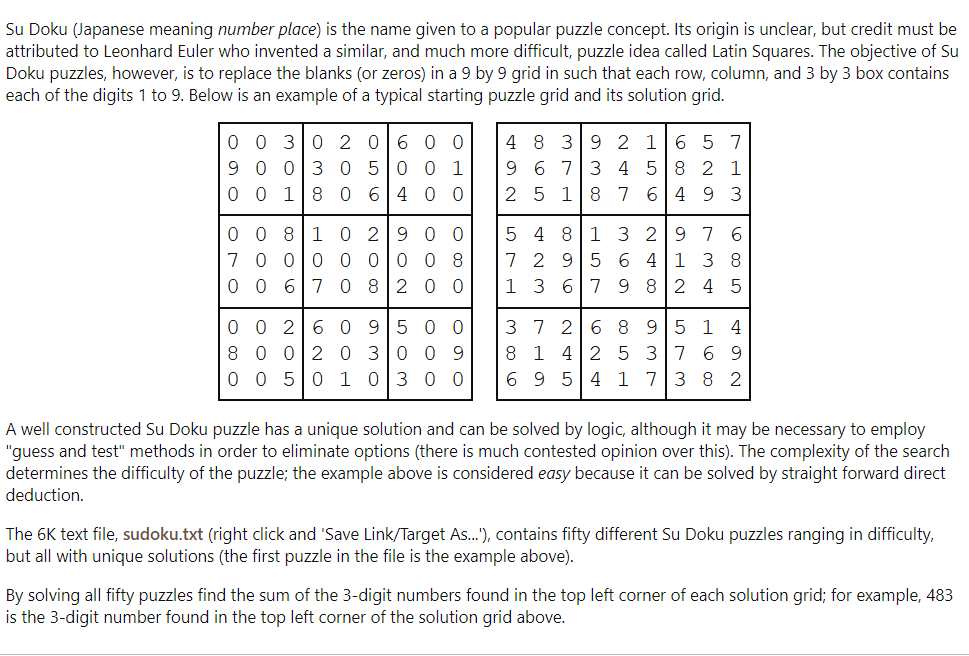

<br>
$**Hint**$

Write a program that checks all possible answers, solve the puzzle and output the final solution.

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time

## Main Solution <a name="Main-Solution"></a>


In [ ]:
start_time = time.time()

def check(row, col, n, puzzle):
    for i in range(9):
        if puzzle[col][i] == n: #row check
            return False

    for i in range(9):
        if puzzle[i][row] == n: #column check
            return False

    x0 = (row // 3) * 3
    y0 = (col // 3) * 3
    for i in range(3):
        for j in range(3):
            if puzzle[y0 + i][x0 + j] == n:  #box check
                return False

    return True


def solve(puzzle):
    for i in range(9):
        for j in range(9):
            if puzzle[i][j] == 0:
                for n in range(1, 10):
                    if check(j, i, n, puzzle):
                        puzzle[i][j] = n
                        yield from solve(puzzle)
                        puzzle[i][j] = 0
                return None
    yield tuple(map(tuple, puzzle))

File = open("096_sudoku.txt", "r")
puzzles = File.readlines()
puzzles = [puzzles[i+1:i+10] for i in range(0, 500, 10)]


answer = 0
for puzzle in puzzles:
    puzzle = list(list(map(int, i.strip())) for i in puzzle)
    solution = next(solve(puzzle))
    answer += int(''.join(map(str, solution[0][:3])))

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 24702 
Execution time: 22.7335 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

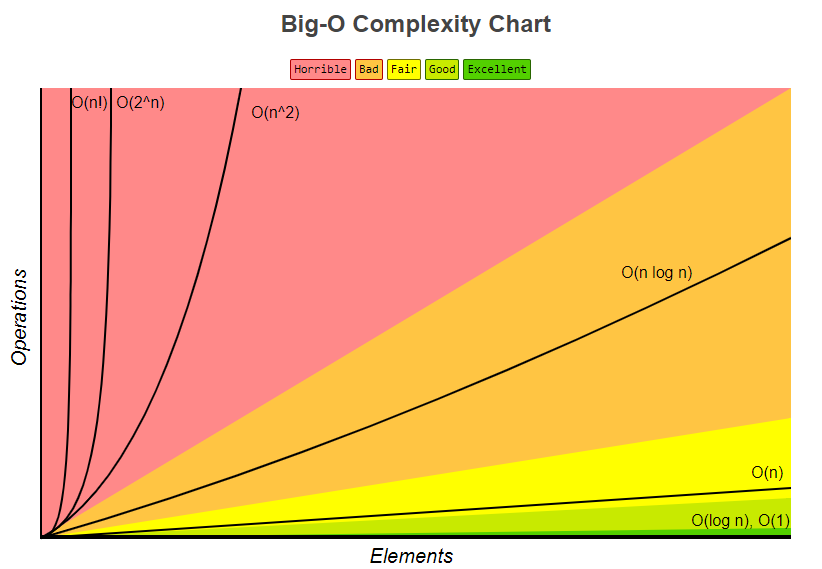

The time and space complexity of my code can be analyzed as follows:

Time Complexity:
- `check` function: The `check` function has three nested loops, each iterating over 9 elements. Therefore, the time complexity of the `check` function is $O(1)$.
- `solve` function: The `solve` function iterates over each cell in the puzzle and performs a recursive search to find a solution. For each empty cell, it tries all possible numbers from 1 to 9 and recursively calls `solve` to check if the number is valid. The number of recursive calls depends on the number of empty cells and the number of possibilities for each cell. In the worst case, the time complexity of the `solve` function can be exponential, but in practice, it tends to be much lower due to constraints and early backtracking.
- Iterating over puzzles: The code iterates over each puzzle and solves it. The time complexity of this part is $O(n)$, where $n$ is the number of puzzles.

Overall, the **time complexity** of the code is dominated by the `solve` function, which can be exponential in the worst case but is generally lower in practice.

Space Complexity:
- `check` function: The `check` function uses a constant amount of additional space. It doesn't create any new data structures that grow with the input size.
- `solve` function: The `solve` function uses recursive calls to solve the puzzle. Each recursive call creates a new stack frame, which consumes additional space. The maximum depth of the recursive calls depends on the number of empty cells in the puzzle. Therefore, the space complexity of the `solve` function is $O(m)$, where $m$ is the maximum depth of the recursive calls.
- `puzzles` list: The `puzzles` list stores the puzzle data read from the file. The space complexity of this part is $O(n)$, where $n$ is the number of puzzles.

Overall, the space complexity of the code is determined by the maximum depth of the recursive calls in the `solve` function and the space used by the `puzzles` list.